In [1]:
import numpy as np
import pandas as pd
import import_ipynb
import data_preperation as dp
import glob
import copy
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


importing Jupyter notebook from data_preperation.ipynb


In [9]:
countries={ 'Austria': 'AT', 'Belgium': 'BE',  'Bulgaria': 'BG', 'Switzerland': 'CH', 'Czech Republic': 'CZ',  'Germany': 'DE', 'Denmark': 'DK', 'Estonia': 'EE', 'Spain': 'ES', 'Finland': 'FI', 'France': 'FR',  'Greece': 'GR', 'Hungary': 'HU', 'Ireland': 'IE', 'Italy': 'IT', 'Lithuania': 'LT', 'Latvia': 'LV', 'Montenegro': 'ME','Netherlands': 'NL', 'Norway': 'NO', 'Poland': 'PL', 'Portugal': 'PT', 'Serbia': 'RS', 'Sweden': 'SE', 'Slovenia': 'SI', 'Slovakia': 'SK', 'United Kingdom': 'GB'}

abbr_list=list(countries.values())

In [ ]:
fuels=['Biomass', 'Fossil Brown coal/Lignite', 'Fossil Coal-derived gas', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil', 'Fossil Oil shale', 'Fossil Peat', 'Geothermal', 'Hydro Pumped Storage', 'Hydro Pumped Storage', 'Hydro Run-of-river and poundage', 'Hydro Water Reservoir', 'Marine', 'Nuclear', 'Other', 'Other renewable', 'Solar', 'Waste', 'Wind Offshore', 'Wind Onshore']

In [2]:
import matplotlib.pyplot as plt 

# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

In [3]:
import import_ipynb
import internal_inconsistencies as ii
import random


importing Jupyter notebook from internal_inconsistencies.ipynb
importing Jupyter notebook from data_preperation.ipynb


## Check total missing values

## Fill missing values

In [ ]:
country = 'Belgium'
inc = False
df = pd.read_csv(f'../Data Sources/ENTSO-E/2018/Generation/Generation per unit/{country}.csv', low_memory=False)
for column in df.columns.values:
    if df.loc[1, column] == 'Actual Consumption':
        df=df.drop(column,axis=1)
        inc = True
if inc:
    df = df.drop(index=1)
df=df.replace(['n/e',np.nan],0)
df = df.T
# print(df)
gen = list(set(df.iloc[:, 0].values))
df = df.groupby(df.iloc[:,0])
for item in gen[1:]:
    x=df.get_group(item).iloc[:,1:]
    tot=0
    for column in x.columns.values:
        tot+=pd.to_numeric(x.loc[:,column]).sum()
    print(item,':',tot)


In [ ]:
country = 'Sweden'
inc = False
data = []

# df_type = pd.read_csv(f"../Data Sources/ENTSO-E/2018/Generation/{country}.csv").iloc[:,2:]
# df_type = df_type.drop(['Hydro Pumped Storage  - Actual Consumption [MW]'], axis=1)
# df_type = df_type.replace(['n/e', np.nan], 0)
# columns = [column[:-26] for column in df_type.columns.values]
# df_type.columns = columns

df_gen = pd.read_csv(f'../Data Sources/ENTSO-E/2018/Generation/Generation per unit/{country}.csv',low_memory=False).iloc[:, 1:]
for column in df_gen.columns.values:
    if df_gen.loc[1, column] == 'Actual Consumption':
        df_gen = df_gen.drop(column, axis=1)
        inc = True
if inc:
    df_gen = df_gen.drop(index=1)
    df_gen = df_gen.reset_index(drop=True)
df_gen = df_gen.replace(['n/e', np.nan], 0)
df_gen = df_gen.T
generation_types = list(set(df_gen.iloc[:, 0].values))
df_gen_group = df_gen.groupby(df_gen.iloc[:, 0])
for item in generation_types:
    selected_data = df_gen_group.get_group(item).iloc[:,1:]
    tot = 0
    for column in selected_data.columns.values:
        tot += pd.to_numeric(selected_data.loc[:, column]).sum()
    print(item, tot)
    data.append([country, item, tot, df_type.loc[:,item].sum()])


In [ ]:
df_gen

In [ ]:
import sys
import numpy as np
import pandas as pd
from entsoe import EntsoePandasClient
client = EntsoePandasClient(api_key='ba09e029-bc4f-417d-9d8c-05ab4ee20a4b')
countries = ['AT', 'BE',  'BG', 'CH', 'CZ',  'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR',
             'HU', 'IE', 'IT', 'LT', 'LV', 'ME', 'NL', 'NO', 'PL', 'PT', 'RS', 'SE', 'SI', 'SK', 'GB']
countries = countries[21:]

In [ ]:
time = ['20200101', '20200201', '20200301', '20200401', '20200501', '20200601',
        '20200701', '20200801', '20200901', '20201001', '20201101', '20201201', '20210101']
uncompleted = []
for country_code in countries:  # Belgium
    yearly_df = pd.DataFrame()
    i = 0
    previous_error = 0
    counter = 0
    while i < len(time)-1:
        start = pd.Timestamp(time[i], tz='Europe/Brussels')
        end = pd.Timestamp(time[i+1], tz='Europe/Brussels')
        try:
            df = client.query_generation_per_plant(
                country_code, start=start, end=end, psr_type=None)
            print(country_code, time[i])
            yearly_df = pd.concat([yearly_df, df], sort=False)
            i += 1

        except:
            error = i
            if error == previous_error:
                counter += 1
            else:
                counter = 0
            previous_error = error
            if counter == 10:
                print('Other Error')
                uncompleted.append(country_code)
                break

    if counter != 10:
        yearly_df.to_csv(
            f'C:/Users/lovin/Google Drive/Master Thesis/Python Code/Data Sources/ENTSO-E/2020/Generation/Generation per unit/{country_code}.csv')
print(uncompleted)


In [5]:
import numpy as np
import internal_inconsistencies as ii
import pandas as pd
import glob
csvs = glob.glob("../Data Sources/ENTSO-E/2018/Generation/Generation per unit/*.csv")
data = []
for csv in csvs:

    df_type,length = ii.omit_dst(pd.read_csv(f'../Data Sources/ENTSO-E/2018/Generation/{csv[60:-4]}.csv', low_memory=False).iloc[:,2:])
    df_type = df_type.drop(['Hydro Pumped Storage  - Actual Consumption [MW]'], axis=1)
    df_type = df_type.replace(['n/e', np.nan], 0)
    columns = [column[:-26] for column in df_type.columns.values]
    df_type.columns = columns

    df_gen = pd.read_csv(csv,low_memory=False).iloc[:, 1:]

    inc = False
    for column in df_gen.columns.values:
        if df_gen.loc[1, column] == 'Actual Consumption':
            df_gen = df_gen.drop(column, axis=1)
            inc = True
    if inc:
        df_gen = df_gen.drop(index=1)
        df_gen = df_gen.reset_index(drop=True)

    df_gen = df_gen.replace(['n/e', np.nan], 0)
    df_gen = df_gen.T

    generation_types = list(set(df_gen.iloc[:, 0].values))
    df_gen = df_gen.groupby(df_gen.iloc[:, 0])
    for item in generation_types:
        selected_data = df_gen.get_group(item).iloc[:, 1:]
        tot = 0
        for column in selected_data.columns.values:
            tot += pd.to_numeric(selected_data.loc[:, column]).sum()
        print(csv[60:-4], item, tot, df_type.loc[:, item].sum()/length)
        data.append([csv[60:-4], item, tot, df_type.loc[:, item].sum()/length])
        # data.append([csv[60:-4], item, tot])
df = pd.DataFrame(data,columns=['Country','Generation type','Based on per generator','Based on per type'])
# df = pd.DataFrame(data,columns=['Country','Generation type','Based on per generator'])
df
# df.to_csv('temp1.csv')


Austria Fossil Hard coal 1439190.0 1422419.5
Austria Hydro Run-of-river and poundage 11300264.0 25363701.25
Austria Hydro Water Reservoir 2018345.0 4650928.5
Austria Hydro Pumped Storage 3009729.0 4696467.0
Austria Fossil Gas 7458582.0 8166846.0
Belgium Biomass 1493407.0 2619943.0
Belgium Hydro Pumped Storage 1014065.0 999764.0
Belgium Wind Offshore 3295644.0 3321049.0
Belgium Nuclear 27255049.0 27251673.0
Belgium Fossil Gas 17182561.0 22303256.0
Czech Republic Fossil Hard coal 1243995.0 3487625.0
Czech Republic Hydro Pumped Storage 987174.0 1041674.0
Czech Republic Nuclear 28187334.0 28228525.0
Czech Republic Fossil Gas 1729169.0 3357028.0
Czech Republic Fossil Brown coal/Lignite 21882971.0 33727959.0
Estonia Fossil Oil shale 9591722 8219587.0
Finland Biomass 1627780 6405436.0
Finland Other 755746 1403978.0
Finland Fossil Hard coal 5093275 5971031.0
Finland Nuclear 21888634 21884428.0
Finland Fossil Gas 2081816 4999951.0
Finland Fossil Oil 4814 17314.0
Finland Fossil Peat 2618173 4275

,Country,Generation type,Based on per generator,Based on per type
0,Austria,Fossil Hard coal,1439190.0,1422419.50
1,Austria,Hydro Run-of-river and poundage,11300264.0,25363701.25
2,Austria,Hydro Water Reservoir,2018345.0,4650928.50
3,Austria,Hydro Pumped Storage,3009729.0,4696467.00
4,Austria,Fossil Gas,7458582.0,8166846.00
...,...,...,...,...
67,Sweden,Fossil Peat,152468.0,0.00
68,Switzerland,Nuclear,24807868.0,24806689.00
69,Switzerland,Hydro Pumped Storage,3765977.0,6885838.00
70,Switzerland,Hydro Run-of-river and poundage,910911.0,1534281.00


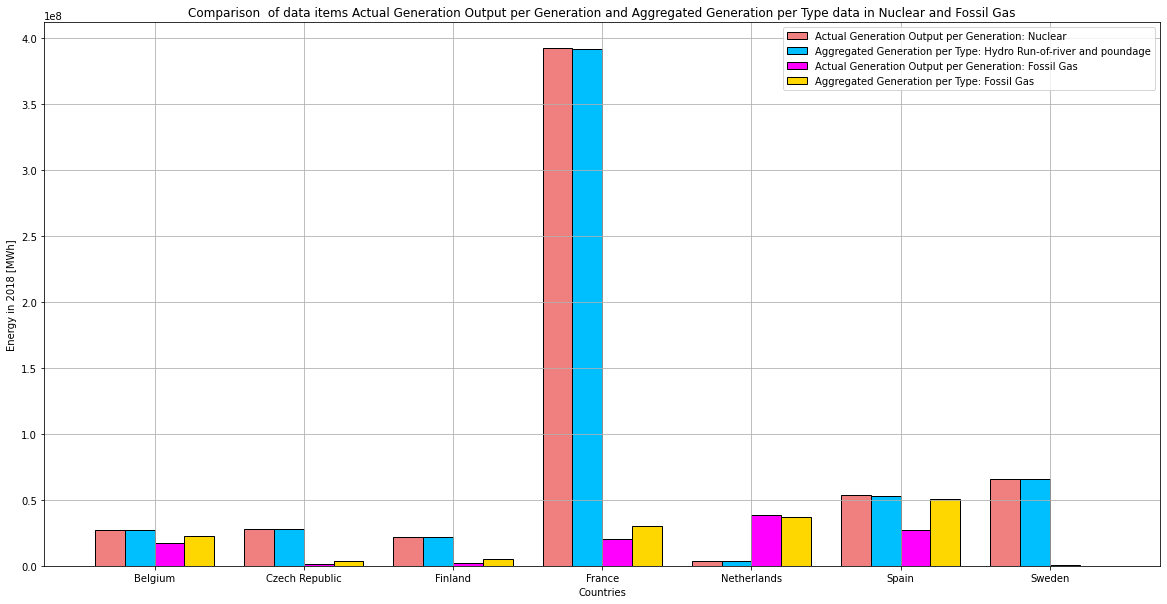

In [59]:
df1 = pd.read_csv('temp1.csv').iloc[:,1:]
y1 = df1.loc[df1['Generation type'] == 'Nuclear']['Country'].values
y2 = df1.loc[df1['Generation type'] == 'Fossil Gas']['Country'].values
y3 = [i for i in y2 if i in y1]

data = df1.loc[(df1['Generation type'] == 'Nuclear') & (df1['Country'].isin(y3))]
x3 = data['Based on per generator'].values
x4 = data['Based on per type'].values
data = df1.loc[(df1['Generation type'] == 'Fossil Gas') & (df1['Country'].isin(y3))]
x5 = data['Based on per generator'].values
x6 = data['Based on per type'].values

width = 0.2
X = np.arange(len(y3))
plt.figure(figsize=(20, 10))
plt.bar([x-3*width/2 for x in X], x3, width, color='lightcoral', edgecolor='black', label='Actual Generation Output per Generation: Nuclear')
plt.bar([x-width/2 for x in X], x4, width, color='deepskyblue', edgecolor='black', label='Aggregated Generation per Type: Hydro Run-of-river and poundage')
plt.bar([x+width/2 for x in X], x5, width, color='magenta', edgecolor='black', label='Actual Generation Output per Generation: Fossil Gas')
plt.bar([x+3*width/2 for x in X], x6, width, color='gold', edgecolor='black', label='Aggregated Generation per Type: Fossil Gas')
plt.xlabel('Countries')
plt.ylabel('Energy in 2018 [MWh]')
plt.title('Comparison  of data items Actual Generation Output per Generation and Aggregated Generation per Type data in Nuclear and Fossil Gas')
plt.xticks(X, y3)
# plt.axhline(y=0, color='black', linestyle='-')
plt.legend()
plt.grid()
plt.show()


In [58]:
y3

['Belgium',
 'Czech Republic',
 'Finland',
 'France',
 'Netherlands',
 'Spain',
 'Sweden']

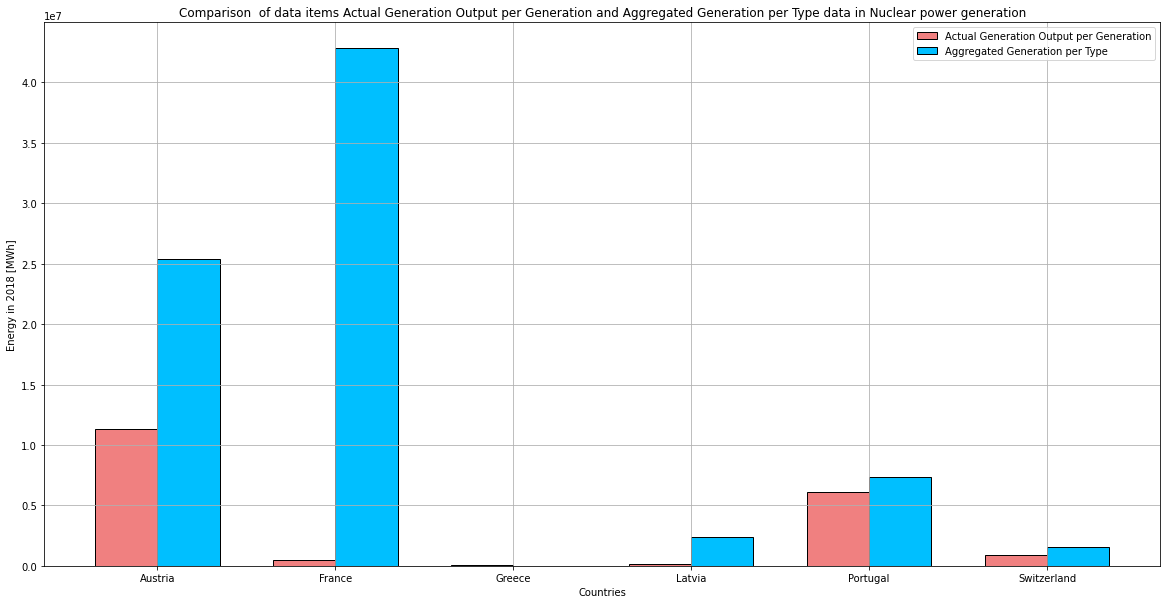

In [12]:
import matplotlib.pyplot as plt
dataframe = df.loc[df['Generation type'] == 'Hydro Run-of-river and poundage']
# dataframe = dataframe.drop(31)
x = dataframe['Country'].values
x1 = dataframe['Based on per generator'].values
x2 = dataframe['Based on per type'].values
width = 0.35
X = np.arange(len(x))
plt.figure(figsize=(20, 10))
plt.bar([x-width/2 for x in X], x1, width, color='lightcoral', edgecolor='black', label='Actual Generation Output per Generation')
plt.bar([x+width/2 for x in X], x2, width, color='deepskyblue', edgecolor='black', label='Aggregated Generation per Type')
plt.xlabel('Countries')
plt.ylabel('Energy in 2018 [MWh]')
plt.title('Comparison  of data items Actual Generation Output per Generation and Aggregated Generation per Type data in Nuclear power generation')
plt.xticks(X, x)
# plt.axhline(y=0, color='black', linestyle='-')
plt.legend()
plt.grid()
plt.show()


In [ ]:
countries = {'Austria': 'AT', 'Belgium': 'BE',  'Bulgaria': 'BG', 'Switzerland': 'CH', 'Czech Republic': 'CZ',  'Germany': 'DE', 'Denmark': 'DK', 'Estonia': 'EE', 'Spain': 'ES', 'Finland': 'FI', 'France': 'FR',  'Greece': 'GR', 'Hungary': 'HU',
             'Ireland': 'IE', 'Italy': 'IT', 'Lithuania': 'LT', 'Latvia': 'LV', 'Montenegro': 'ME', 'Netherlands': 'NL', 'Norway': 'NO', 'Poland': 'PL', 'Portugal': 'PT', 'Serbia': 'RS', 'Sweden': 'SE', 'Slovenia': 'SI', 'Slovakia': 'SK', 'United Kingdom': 'UK'}
generation_types = {'biomass': ['Biomass  - Actual Aggregated [MW]'], 'gas': [
    'Fossil Gas  - Actual Aggregated [MW]', 'Fossil Coal-derived gas  - Actual Aggregated [MW]'], 'hard_coal': ['Fossil Hard coal  - Actual Aggregated [MW]'], 'hydro': ['Hydro Pumped Storage  - Actual Aggregated [MW]', 'Hydro Run-of-river and poundage  - Actual Aggregated [MW]', 'Hydro Water Reservoir  - Actual Aggregated [MW]', 'Marine  - Actual Aggregated [MW]'], 'lignite': ['Fossil Brown coal/Lignite  - Actual Aggregated [MW]'], 'other_fossil': ['Fossil Oil  - Actual Aggregated [MW]', 'Fossil Oil shale  - Actual Aggregated [MW]', 'Fossil Peat  - Actual Aggregated [MW]'], 'nuclear': ['Nuclear  - Actual Aggregated [MW]'], 'other_renewable': ['Other renewable  - Actual Aggregated [MW]', 'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]'], 'wind_onshore': ['Wind Onshore  - Actual Aggregated [MW]'], 'wind_offshore': ['Wind Offshore  - Actual Aggregated [MW]']}
for key,value in generation_types.items():
    value.append(0)
generation = {country: copy.deepcopy(generation_types) for country in countries}
for country in countries:
    df_orig, length = ii.omit_dst(pd.read_csv(
        f'../Data Sources/ENTSO-E/2018/Generation/{country}.csv', low_memory=False).iloc[:, 2:])
    if 'Hydro Pumped Storage  - Actual Consumption [MW]' in df_orig.columns.values:
        df_orig = df_orig.drop(
            ['Hydro Pumped Storage  - Actual Consumption [MW]'], axis=1)

    df_orig = df_orig.replace(['n/e', np.nan], 0)
    if(df_orig[column] == 0).all():
        df_orig = df_orig.drop(column, axis=1)

    for column in df_orig.columns.values:
        for key, value in generation_types.items():
            if column in generation_types[key]:
                generation[country][key][-1] += df_orig[column].sum()/length

x = []
for key, values in generation.items():
    for sub_key, value in values.items():
        if value[-1] != 0:
            x.append([key, sub_key, value[-1]])
df = pd.DataFrame(x, columns=['Country', 'GenerationType', 'Value[MW]'])
df



In [4]:
def polynomial(selected_values, selected_index):

    # We get all the indexes in the 'selected_values' to a 2D numpy array 'X'.
    # We get all the values in the 'selected_values'to a 1D numpy array 'y'
    # Then we fill the null values in array 'y' with the mean value of the array.
    # Then we divide 'X' and 'y' values in the ratio of 30% test and 70% train data.
    # We create an array of degree values from 1 to 10.
    # Then we iterate the 'degrees' one by one and create polynomial values of 'x_train' data called 'x_poly_train' based on the value of the degree
    # Then we fit the polynomial linear regression function using 'x_poly_train' data and 'y_train' data.
    # Then based on the polynomial function, using the 'x_poly_test' data we predict the values of the 'y_test' data
    # Then based on the predicted values and 'y_test" data we calculate the Root Mean Square Error.
    # Applying the last 4 steps for each degree value, we select the degree value which gives the Lowest Root Mean Square Error.
    # Then we fit the polynomial linear regression function again using that degree which gives the Lowest Root Mean Square Error.
    # Based on the polynimial function we get the predicted value of the null value.

    X = np.array([i[0] for i in selected_values]
                 ).reshape(len(selected_values), 1)
    y = [i[1] for i in selected_values]
    mean = np.nanmean(y)
    y = [mean if pd.isna(x) else x for x in y]

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

    degrees = np.arange(1, 11)
    min_rmse, min_deg = 1e10, 0

    for degree in degrees:

        # Preparing polynomial Train features based on x_train
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        x_poly_train = poly_features.fit_transform(x_train)

        # Polynomial linear regression based on train data
        poly_reg = LinearRegression()
        poly_reg.fit(x_poly_train, y_train)

        # Predicting y values and getting root mean squared error based on predicted y values and y_test values
        x_poly_test = poly_features.fit_transform(x_test)
        poly_predict = poly_reg.predict(x_poly_test)
        poly_mse = mean_squared_error(y_test, poly_predict)
        poly_rmse = np.sqrt(poly_mse)

        # Selecting the best degree of the polynimial function based on lowest root mean squared error
        if min_rmse > poly_rmse:
            min_rmse = poly_rmse
            min_deg = degree

    # Fitting the regression function again based on the selected best degree above
    poly_features = PolynomialFeatures(degree=min_deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    prediction = poly_reg.predict(
        poly_features.fit_transform([[selected_index]]))[0]
    if prediction < 0:
        prediction = 0

    return(min_deg,prediction)


def mean(selected_values):
    if pd.isnull(selected_values).sum() != len(selected_values):
        mean_value = np.nanmean(selected_values)
        selected_values = [mean_value if pd.isna(x) else x for x in selected_values]
        prediction = np.mean(np.array(selected_values))
    else:
        prediction = 0

    return prediction


In [ ]:
selected_values


## DO NOT DELETE

In [66]:
# x = ['Germany', 'Spain', 'Greece', 'Hungary', 'Montenegro']
for i in range(9):
    globals()[f'counter_{i}'] =0
counter =0
f = open('neighbors of missing values.txt', 'w')
# for country,abbr in countries.items():
country='Lithuania'
df, length = ii.omit_dst(pd.read_csv(f'../Data Sources/ENTSO-E/2018/Load/{country}.csv', low_memory=False).iloc[:,2:])
if 'Hydro Pumped Storage  - Actual Consumption [MW]' in df.columns.values:
    df=df.drop(['Hydro Pumped Storage  - Actual Consumption [MW]'],axis=1)
for column in df.columns.values:
    column_data = {}
    for index, value in enumerate(df.loc[:, column]):
        column_data[index] = value
    # null_values = [index for index,value in enumerate(df.loc[:,column]) if pd.isnull(df.loc[index,column])] #NEW

    for selected_index, selected_value in column_data.items():
        if pd.isnull(column_data[selected_index]) and selected_index in range(3*length, len(df[column])-3*length):
    
    # for selected_index in null_values:
    #     if selected_index in range(3*length, len(df[column])-3*length):
            selected_values = []
            for i in [x for x in range(-3,4) if x!=0]:
                selected_values.append([selected_index + i*length,column_data[selected_index + i*length]]) # Change df.loc with column_data
            if pd.isnull(selected_values).sum() >=3 and selected_index in range(27*length, len(df[column])-27*length):
                selected_values = []
                for i in [x for x in range(-3, 4) if x != 0]:
                    for j in [-24,0,24]:
                        selected_values.append([selected_index + (i+j)*length,column_data[selected_index + (i+j)*length]])
                if pd.isnull(selected_values).sum() >= 14 and selected_index in range(51*length, len(df[column])-51*length):
                    selected_values = []
                    for i in [x for x in range(-3, 4) if x != 0]:
                        for j in [-48,-24,0, 24,48]:
                            selected_values.append([selected_index + (i+j)*length,column_data[selected_index + (i+j)*length]])
                    # print(selected_values)
                    if pd.isnull(selected_values).sum() >= 26 and pd.isnull(selected_values).sum() < len(selected_values):
                        prediction = np.mean(np.array([i[1] for i in selected_values]))
                        f.write(f'{country},{column},{selected_index},{len(selected_values)},{len(selected_values) - pd.isnull(selected_values).sum()},{prediction}, Average\n')
                        counter_0 +=1
                    elif pd.isnull(selected_values).sum() < 26:
                        min_deg,prediction = polynomial(selected_values,selected_index)
                        f.write(f'{country},{column},{selected_index},{len(selected_values)},{len(selected_values) - pd.isnull(selected_values).sum()},{prediction}, PLR, {min_deg}\n')
                        counter_1 +=1
                    else:
                        f.write(f'{country},{column},{selected_index},{len(selected_values)},{len(selected_values) - pd.isnull(selected_values).sum()},{0}, Zero\n')
                        counter_2 +=1
                elif pd.isnull(selected_values).sum() >= 14:
                    prediction = np.mean(np.array([i[1] for i in selected_values]))
                    f.write(f'{country},{column},{selected_index},{len(selected_values)},{len(selected_values) - pd.isnull(selected_values).sum()},{prediction}, Average\n')
                    counter_3 +=1
                else:
                    min_deg,prediction = polynomial(selected_values,selected_index)
                    f.write(f'{country},{column},{selected_index},{len(selected_values)},{len(selected_values) - pd.isnull(selected_values).sum()},{prediction}, PLR, {min_deg}\n')
                    counter_4 +=1
            elif pd.isnull(selected_values).sum() >= 3:
                prediction = np.mean(np.array([i[1] for i in selected_values]))
                f.write(f'{country},{column},{selected_index},{len(selected_values)},{len(selected_values) - pd.isnull(selected_values).sum()},{prediction}, Average\n')
                counter_5 += 1
            else:
                min_deg,prediction = polynomial(selected_values, selected_index)
                f.write(f'{country},{column},{selected_index},{len(selected_values)},{len(selected_values) - pd.isnull(selected_values).sum()},{prediction}, PLR, {min_deg}\n')
                counter_6 +=1
        elif pd.isnull(column_data[selected_index]) and selected_index < 3*length: # Add pd.isnull(df.loc[selected_index]) and to the begining
            prediction = np.mean(np.array([column_data[i] for i in range(3*length)])) # Chnage df.loc with column_data[i]
            f.write(f'{country},{column},{selected_index},{prediction}, Average\n')
            counter_7 +=1
        elif pd.isnull(column_data[selected_index]) and selected_index >= (len(df[column])-3*length): # Add pd.isnull(df.loc[selected_index]) and to the begining
            prediction = np.mean(np.array([column_data[i] for i in range(len(df[column])-3*length,len(df[column]))]))  # Chnage df.loc with column_data[i]
            f.write(f'{country},{column},{selected_index},{prediction}, Average\n')
            counter_8 +=1
        # selected_weekly_column_data = [[index, value] for index, value in enumerate(df.loc[:, column]) if index in range(7*24*length,len(df[column])-7*24*length) and pd.isnull(value)]
        # counter3 += len(selected_weekly_column_data)
        # for selected_index,selected_value in selected_weekly_column_data:

            # if pd.isnull(column_data[selected_index]) and selected_index in range(7*24*length, len(df[column])-7*24*length):
            #     f.write(f'{country},{column},{selected_index},{(column_data[selected_index-7*24*length] + column_data[selected_index +7*24*length])/2} \n')
            # elif pd.isnull(column_data[selected_index]) and selected_index not in range(7*24*length, len(df[column])-7*24*length):
            #     f.write(f'{country},{column},{selected_index},{0} \n')

                # print(country, column, selected_index, selected_index-7*24*length, selected_index +7*24*length)
    # print(country,counter5)
for i in range(9):
    print(globals()[f'counter_{i}'])


0
0
0
0
30
24
10
3
0


## Column wise check what generation type suits hourly and which suits weekly

In [ ]:
selected_countries = {'Austria':"AT", 'Denmark':"DK", 'Norway':"NO", 'Portugal':"PT"}
csvs = glob.glob("../Data Sources/ENTSO-E/2018/Transmission/*.csv")
selected_csvs= [item for item in csvs for country in list(selected_countries.values()) if item[42:44] == country or item[45:47] == country ]
print(len(csvs))
tx_list = []
length = 1
# for item in csvs:
#     for country in list(selected_countries.values()):
#         # if not ((item[42:44] == country) or (item[45:47] == country)):
#         if item[42:44] == country or item[45:47] == country:
#             selected_csvs.append(item)
#             # csvs.remove(item)
print(selected_csvs)


In [26]:
selected_countries = {'Austria':"AT", 'Denmark':"DK", 'Norway':"NO", 'Portugal':"PT"}
dic = {"Austria": [], "Denmark":[], 'Norway': [], 'Portugal':[]}
countries =list(selected_countries.keys())
# countries = ['Belgium']
for item in ['Generation','Load']:
    f = open('neighbors of missing values.txt', 'a')
    for country in countries:
        count = 0
        sum_orig = 0
        sum_edit = 0
        df_orig, length = dp.omit_dst(pd.read_csv(
            f'../Data Sources/ENTSO-E/2018/{item}/{country}.csv', low_memory=False).iloc[:, 2:])
        if 'Hydro Pumped Storage  - Actual Consumption [MW]' in df_orig.columns.values:
            df_orig = df_orig.drop(
                ['Hydro Pumped Storage  - Actual Consumption [MW]'], axis=1)

        for column in df_orig.columns.values:
            df_orig = df_orig.replace(['n/e',np.nan], 0)
            if(df_orig[column] == 0).all():
                df_orig = df_orig.drop(column, axis=1)

        df_hourly = copy.deepcopy(df_orig)
        df_weekly = copy.deepcopy(df_orig)

        for column in df_orig.columns.values:

            deleted_values = []
            values = np.random.randint(low=0, high=8760*length, size=876*length)
            for value in values:
                # x = random.choice(range(20))
                df_hourly.loc[value, column] = np.nan
                df_weekly.loc[value, column] = np.nan
                deleted_values.append([value, column])

            column_data = {}
            for index, value in enumerate(df_orig.loc[:, column]):
                column_data[index] = value
            # selected_hourly_column_data = [[index, value] for index, value in enumerate(df.loc[:, column]) if index in range(3*length,len(df[column])-3*length) and pd.isnull(value)]
            # for selected_index,selected_value in selected_hourly_column_data:
            for selected_index in values:
                if selected_index in range(3*length, len(df_hourly[column])-3*length):
                    selected_values = []
                    for i in [x for x in range(-3, 4) if x != 0]:
                        selected_values.append(
                            [selected_index + i*length, column_data[selected_index + i*length]])
                    if pd.isnull(selected_values).sum() >= 3 and selected_index in range(27*length, len(df_hourly[column])-27*length):
                        selected_values = []
                        for i in [x for x in range(-3, 4) if x != 0]:
                            for j in [-24, 0, 24]:
                                selected_values.append(
                                    [selected_index + (i+j)*length, column_data[selected_index + (i+j)*length]])
                        if pd.isnull(selected_values).sum() >= 14 and selected_index in range(51*length, len(df_hourly[column])-51*length):
                            selected_values = []
                            for i in [x for x in range(-3, 4) if x != 0]:
                                for j in [-48, -24, 0, 24, 48]:
                                    selected_values.append(
                                        [selected_index + (i+j)*length, column_data[selected_index + (i+j)*length]])
                            # print(selected_values)
                            if pd.isnull(selected_values).sum() >= 26 and pd.isnull(selected_values).sum() < len(selected_values):
                                prediction = mean([i[1] for i in selected_values])
                                df_hourly.loc[selected_index, column] = prediction

                            elif pd.isnull(selected_values).sum() < 26:
                                min_deg, prediction = polynomial(
                                    selected_values, selected_index)
                                df_hourly.loc[selected_index, column] = prediction

                            else:
                                df_hourly.loc[selected_index, column] = 0

                        elif pd.isnull(selected_values).sum() >= 14:
                            prediction = mean([i[1] for i in selected_values])
                            df_hourly.loc[selected_index, column] = prediction

                        else:
                            min_deg, prediction = polynomial(
                                selected_values, selected_index)
                            df_hourly.loc[selected_index, column] = prediction

                    elif pd.isnull(selected_values).sum() >= 3:
                        prediction = mean([i[1] for i in selected_values])
                        df_hourly.loc[selected_index, column] = prediction

                    else:
                        min_deg, prediction = polynomial(
                            selected_values, selected_index)
                        df_hourly.loc[selected_index, column] = prediction

                elif selected_index < 3*length:
                    selected_values = [column_data[i] for i in range(3*length)]
                    prediction = mean(selected_values)
                    df_hourly.loc[selected_index, column] = prediction

                elif selected_index >= (len(df_hourly[column])-3*length):
                    selected_values = [column_data[i] for i in range(
                        len(df_hourly[column])-3*length, len(df_hourly[column]))]
                    prediction = mean(selected_values)
                    df_hourly.loc[selected_index, column] = prediction

                if selected_index in range(7*24*length, len(df_weekly[column])-7*24*length):
                    df_weekly.loc[selected_index, column] = (
                        column_data[selected_index-7*24*length] + column_data[selected_index + 7*24*length])/2

                elif selected_index not in range(7*24*length, len(df_weekly[column])-7*24*length):
                    df_weekly.loc[selected_index, column] = 0

            counter_1 = [df_hourly.loc[i, column] for i in values]
            counter_1 = [0 if pd.isna(x) else x for x in counter_1]
            # sum_orig = sum([df_orig.loc[i, column] for i in values])
            # sum_edit = sum(counter_1)

            # percentage = round((sum_orig - sum_edit)*100/sum_orig, 3)
            # # if percentage > 0:
            # f.write(f'{country} - {column}: {percentage}\n')
            # print(f'{country} - {column}: {percentage}')
            sum_orig += sum([df_orig.loc[i, column] for i in values])
            sum_edit += sum(counter_1)

        percentage = round(abs((sum_edit - sum_orig)*100/sum_orig), 3)
        dic[country].append(percentage)
        # f.write(f'{country}: {percentage}\n')
        # print(f'{country}: {percentage}')

    f.close()
csvs = glob.glob("../Data Sources/ENTSO-E/2018/Transmission/*.csv")
selected_csvs= [item for item in csvs for country in list(selected_countries.values()) if item[42:44] == country or item[45:47] == country ]
di = {"AT": [0,0], "DK": [0,0], 'NO': [0,0], 'PT': [0,0]}
tx_list = []
length = 1
# for csv in selected_csvs:
#     temp, divider_transmission = ii.omit_dst(pd.read_csv(csv).iloc[:, 1:])
#     if temp.isnull().sum().sum() == 0:
#         tx_list.append(csv)

f = open('neighbors of missing values.txt', 'a')
for tx in selected_csvs:
    sum_edit = 0
    sum_orig = 0
    df_orig = pd.read_csv(tx, low_memory=False).iloc[:, 1:]

    df_hourly = copy.deepcopy(df_orig)
    df_weekly = copy.deepcopy(df_orig)

    for column in df_orig.columns.values:

        deleted_values = []
        values = np.random.randint(low=0, high=8760*length, size=876*length)
        for value in values:
            # x = random.choice(range(20))
            df_hourly.loc[value, column] = np.nan
            df_weekly.loc[value, column] = np.nan
            deleted_values.append([value, column])

        column_data = {}
        for index, value in enumerate(df_orig.loc[:, column]):
            column_data[index] = value
        # selected_hourly_column_data = [[index, value] for index, value in enumerate(df.loc[:, column]) if index in range(3*length,len(df[column])-3*length) and pd.isnull(value)]
        # for selected_index,selected_value in selected_hourly_column_data:
        for selected_index in values:
            if selected_index in range(3*length, len(df_hourly[column])-3*length):
                selected_values = []
                for i in [x for x in range(-3, 4) if x != 0]:
                    selected_values.append(
                        [selected_index + i*length, column_data[selected_index + i*length]])
                if pd.isnull(selected_values).sum() >= 3 and selected_index in range(27*length, len(df_hourly[column])-27*length):
                    selected_values = []
                    for i in [x for x in range(-3, 4) if x != 0]:
                        for j in [-24, 0, 24]:
                            selected_values.append(
                                [selected_index + (i+j)*length, column_data[selected_index + (i+j)*length]])
                    if pd.isnull(selected_values).sum() >= 14 and selected_index in range(51*length, len(df_hourly[column])-51*length):
                        selected_values = []
                        for i in [x for x in range(-3, 4) if x != 0]:
                            for j in [-48, -24, 0, 24, 48]:
                                selected_values.append(
                                    [selected_index + (i+j)*length, column_data[selected_index + (i+j)*length]])
                        # print(selected_values)
                        if pd.isnull(selected_values).sum() >= 26 and pd.isnull(selected_values).sum() < len(selected_values):
                            prediction = mean([i[1] for i in selected_values])
                            df_hourly.loc[selected_index, column] = prediction

                        elif pd.isnull(selected_values).sum() < 26:
                            min_deg, prediction = polynomial(
                                selected_values, selected_index)
                            df_hourly.loc[selected_index, column] = prediction

                        else:
                            df_hourly.loc[selected_index, column] = 0

                    elif pd.isnull(selected_values).sum() >= 14:
                        prediction = mean([i[1] for i in selected_values])
                        df_hourly.loc[selected_index, column] = prediction

                    else:
                        min_deg, prediction = polynomial(
                            selected_values, selected_index)
                        df_hourly.loc[selected_index, column] = prediction

                elif pd.isnull(selected_values).sum() >= 3:
                    prediction = mean([i[1] for i in selected_values])
                    df_hourly.loc[selected_index, column] = prediction

                else:
                    min_deg, prediction = polynomial(
                        selected_values, selected_index)
                    df_hourly.loc[selected_index, column] = prediction

            elif selected_index < 3*length:
                selected_values = [column_data[i] for i in range(3*length)]
                prediction = mean(selected_values)
                df_hourly.loc[selected_index, column] = prediction

            elif selected_index >= (len(df_hourly[column])-3*length):
                selected_values = [column_data[i] for i in range(
                    len(df_hourly[column])-3*length, len(df_hourly[column]))]
                prediction = mean(selected_values)
                df_hourly.loc[selected_index, column] = prediction

        if selected_index in range(7*24*length, len(df_weekly[column])-7*24*length):
            df_weekly.loc[selected_index, column] = (
                column_data[selected_index-7*24*length] + column_data[selected_index + 7*24*length])/2

        elif selected_index not in range(7*24*length, len(df_weekly[column])-7*24*length):
            df_weekly.loc[selected_index, column] = 0

        # index = [i for i in range(8760*length)]
        counter_1 = [df_hourly.loc[i, column] for i in values]
        counter_1 = [0 if pd.isna(x) else x for x in counter_1]
        # sum_orig = sum([df_orig.loc[i, column] for i in values])
        # sum_edit = sum(counter_1)

        if tx[42:44] in di.keys():
            di[tx[42:44]][0] += sum([df_orig.loc[i, column] for i in values])
            di[tx[42:44]][1] += sum(counter_1)
        if tx[45:47] in di.keys():
            di[tx[45:47]][0] += sum([df_orig.loc[i, column] for i in values])
            di[tx[45:47]][1] += sum(counter_1)


        # percentage = round((sum_orig - sum_edit)*100/sum_orig, 3)
        # # if percentage > 0:
        # f.write(f'{tx[42:44]} - > {tx[45:47]} - {column}: {percentage}\n')
        # print(f'{tx[42:44]} - > {tx[45:47]} - {column}: {percentage}')

        # sum_orig += sum([df_orig.loc[i, column] for i in values])
        # sum_edit += sum(counter_1)

    # percentage = round((sum_orig - sum_edit)*100/sum_orig, 3)

    # f.write(f'{tx[42:44]} - > {tx[45:47]}: {percentage}\n')
    # print(f'{tx[42:44]} - > {tx[45:47]}: {percentage}')

f.close()


KeyboardInterrupt: 

In [6]:
print(dic)
for key,value in di.items():
    print(key,round((value[1]-value[0])*100/value[0],2))

{'Austria': [0.093, 0.102], 'Denmark': [0.159, 0.118], 'Norway': [0.064, 0.043], 'Portugal': [0.012, 0.023]}
AT -0.27
DK -0.01
NO 0.61
PT 0.63


In [7]:
generation = [x[0] for x in dic.values()]
load = [x[1] for x in dic.values()]
tx = [round(abs((value[1]-value[0])*100/value[0]), 2) for value in di.values()]


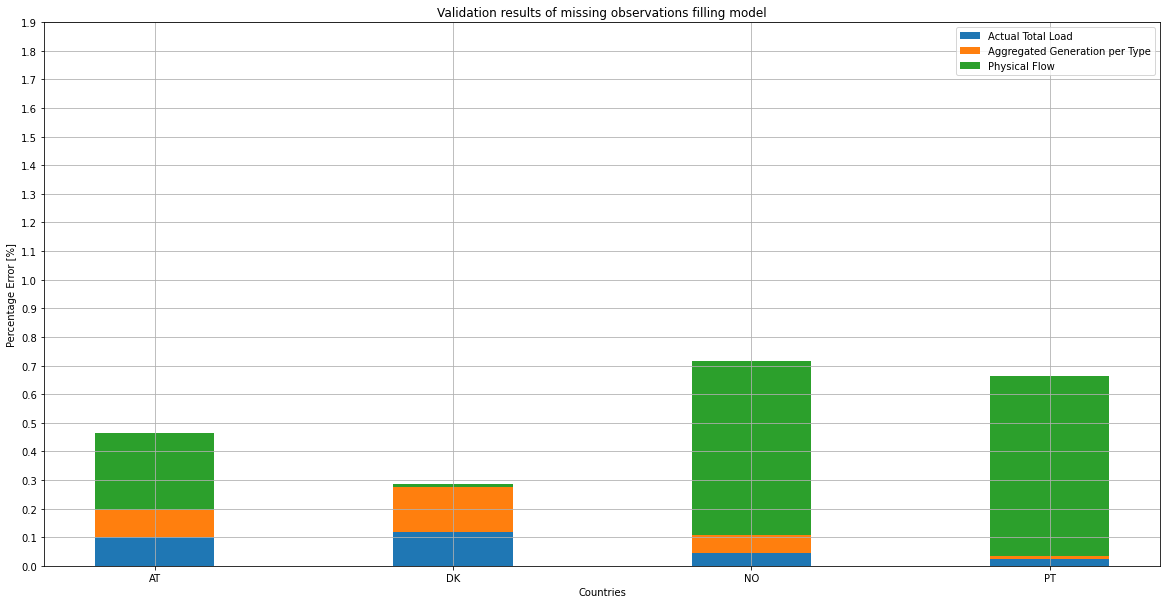

In [8]:
x = di.keys()
b_tx = list(np.add(generation,load))
plt.figure(figsize=(20, 10))
plt.bar(x, load, 0.4, label='Actual Total Load')
plt.bar(x,generation,0.4,bottom=load,label='Aggregated Generation per Type')
plt.bar(x, tx, 0.4, bottom=b_tx, label='Physical Flow')
plt.xlabel('Countries')
plt.yticks(np.arange(0,2,0.1))
plt.ylabel('Percentage Error [%]')
plt.title('Validation results of missing observations filling model')
plt.grid()
plt.legend()
plt.show()


In [ ]:
df.loc[df['Column'] == 'Hydro Water Reservoir']


In [25]:
import numpy as np
import import_ipynb
import internal_inconsistencies as ii
import pandas as pd
import glob
# csvs = glob.glob("../Data Sources/ENTSO-E/2018/Generation/Generation per unit/*.csv")
csvs = glob.glob("../Data Sources/ENTSO-E/2018/Generation/x/*.csv")
data = []
for csv in csvs:

    df_type, length = ii.omit_dst(pd.read_csv(f'../Data Sources/ENTSO-E/2018/Generation/{csv[42:-4]}.csv', low_memory=False).iloc[:, 2:])
    df_type = df_type.drop(['Hydro Pumped Storage  - Actual Consumption [MW]'], axis=1)
    df_type = df_type.replace(['n/e', np.nan], 0)
    columns = [column[:-26] for column in df_type.columns.values]
    df_type.columns = columns

    df_gen = pd.read_csv(csv, low_memory=False).iloc[:, 1:]

    inc = False
    for column in df_gen.columns.values:
        if df_gen.loc[0, column] == 'Actual Consumption':
            df_gen = df_gen.drop(column, axis=1)
            inc = True
    if inc:
        df_gen = df_gen.drop(index=0)
        df_gen = df_gen.reset_index(drop=True)

    df_gen = df_gen.replace(['n/e', np.nan], 0)

    for column in df_gen.columns.values:

        x = pd.to_numeric(df_gen.loc[:, column]).sum()
        print(csv[42:-4], x, df_type[column].sum())
        data.append([csv[42:-4],column, x, df_type.loc[:,column].sum(),tot])
df = pd.DataFrame(data, columns=['Country','Column', 'New', 'Old','Difference'])
df
df.to_csv('temp.csv')


FileNotFoundError: [Errno 2] No such file or directory: '../Data Sources/ENTSO-E/2018/Generation/Generation per unit/Bulgaria.csv'

In [69]:
# def validation(selected_countries):
# selected_countries = {'Norway': 'NO', 'Portugal': "PT"}
selected_countries = {'Austria': "AT",
                      'Denmark': "DK", 'Norway': "NO", 'Portugal': "PT"}
countries = list(selected_countries.keys())
dic = {}
for country in countries:
    dic[country] = []

for item in ['Generation', 'Load']:
    # for item in ['Load']:
    for country in countries:
        sum_orig = 0
        sum_fill = 0
        df_orig, length = omit_dst(pd.read_csv(
            f'../Data Sources/ENTSO-E/2018/{item}/{country}.csv', low_memory=False).iloc[:, 2:])

        # df_hourly = copy.deepcopy(df_orig)

        for column in df_orig.columns.values:
            # df_column = df_orig[[column]]

            deleted_values = []
            values = np.random.randint(
                low=0, high=8760*length, size=876*length)

            for value in values:
                # x = random.choice(range(20))
                df_column.loc[value, column] = np.nan
                deleted_values.append([value, column])

            fill_missing_data(df_column.loc[:, column:], df_orig)

            # column_data = {}
            # for index, value in enumerate(df_hourly.loc[:, column]):
            #     column_data[index] = value
            # selected_hourly_column_data = [[index, value] for index, value in enumerate(df.loc[:, column]) if index in range(3*length,len(df[column])-3*length) and pd.isnull(value)]
            # for selected_index,selected_value in selected_hourly_column_data:
        #     for selected_index in values:
        #         if selected_index in range(3*length, len(df_hourly[column])-3*length):
        #             selected_values = []
        #             for i in [x for x in range(-3, 4) if x != 0]:
        #                 selected_values.append(
        #                     [selected_index + i*length, column_data[selected_index + i*length]])
        #             if pd.isnull(selected_values).sum() >= 3 and selected_index in range(27*length, len(df_hourly[column])-27*length):
        #                 selected_values = []
        #                 for i in [x for x in range(-3, 4) if x != 0]:
        #                     for j in [-24, 0, 24]:
        #                         selected_values.append(
        #                             [selected_index + (i+j)*length, column_data[selected_index + (i+j)*length]])
        #                 if pd.isnull(selected_values).sum() >= 14 and selected_index in range(51*length, len(df_hourly[column])-51*length):
        #                     selected_values = []
        #                     for i in [x for x in range(-3, 4) if x != 0]:
        #                         for j in [-48, -24, 0, 24, 48]:
        #                             selected_values.append(
        #                                 [selected_index + (i+j)*length, column_data[selected_index + (i+j)*length]])
        #                     # print(selected_values)
        #                     if pd.isnull(selected_values).sum() >= 26 and pd.isnull(selected_values).sum() < len(selected_values):
        #                         prediction = mean([i[1] for i in selected_values])
        #                         df_hourly.loc[selected_index, column] = prediction

        #                     elif pd.isnull(selected_values).sum() < 26:
        #                         min_deg, prediction = polynomial(
        #                             selected_values, selected_index)
        #                         df_hourly.loc[selected_index, column] = prediction

        #                     else:
        #                         df_hourly.loc[selected_index, column] = 0

        #                 elif pd.isnull(selected_values).sum() >= 14:
        #                     prediction = mean([i[1] for i in selected_values])
        #                     df_hourly.loc[selected_index, column] = prediction

        #                 else:
        #                     min_deg, prediction = polynomial(
        #                         selected_values, selected_index)
        #                     df_hourly.loc[selected_index, column] = prediction

        #             elif pd.isnull(selected_values).sum() >= 3:
        #                 prediction = mean([i[1] for i in selected_values])
        #                 df_hourly.loc[selected_index, column] = prediction

        #             else:
        #                 min_deg, prediction = polynomial(
        #                     selected_values, selected_index)
        #                 df_hourly.loc[selected_index, column] = prediction

        #         elif selected_index < 3*length:
        #             selected_values = [column_data[i] for i in range(3*length)]
        #             prediction = mean(selected_values)
        #             df_hourly.loc[selected_index, column] = prediction

        #         elif selected_index >= (len(df_hourly[column])-3*length):
        #             selected_values = [column_data[i] for i in range(
        #                 len(df_hourly[column])-3*length, len(df_hourly[column]))]
        #             prediction = mean(selected_values)
        #             df_hourly.loc[selected_index, column] = prediction

            filled_values = [df_column.loc[i, column] for i in values]
            filled_values = [0 if pd.isna(x) else x for x in filled_values]
            # sum_orig = sum([df_orig.loc[i, column] for i in values])
            # sum_fill = sum(counter_1)

            # percentage = round((sum_orig - sum_fill)*100/sum_orig, 3)
            # # if percentage > 0:
            # f.write(f'{country} - {column}: {percentage}\n')
            # print(f'{country} - {column}: {percentage}')
            sum_orig += sum([df_orig.loc[i, column] for i in values])
            sum_fill += sum(filled_values)

        percentage = round(abs((sum_fill - sum_orig)*100/sum_orig), 3)
        dic[country].append(percentage)
        # f.write(f'{country}: {percentage}\n')
        # print(f'{country}: {percentage}')


yes


In [27]:
selected_countries = {'Austria': "AT",
                      'Denmark': "DK", 'Norway': "NO", 'Portugal': "PT"}
csvs = glob.glob("../Data Sources/ENTSO-E/2018/Transmission/*.csv")
# selected_csvs= [item for item in csvs for country in list(selected_countries.values()) if item[42:44] == country or item[45:47] == country ]
# selected_csvs


['../Data Sources/ENTSO-E/2018/Transmission\\AT-CH.csv',
 '../Data Sources/ENTSO-E/2018/Transmission\\AT-CZ.csv',
 '../Data Sources/ENTSO-E/2018/Transmission\\AT-DE.csv',
 '../Data Sources/ENTSO-E/2018/Transmission\\AT-HU.csv',
 '../Data Sources/ENTSO-E/2018/Transmission\\AT-IT.csv',
 '../Data Sources/ENTSO-E/2018/Transmission\\AT-SI.csv',
 '../Data Sources/ENTSO-E/2018/Transmission\\DE-DK.csv',
 '../Data Sources/ENTSO-E/2018/Transmission\\DK-NO.csv',
 '../Data Sources/ENTSO-E/2018/Transmission\\DK-NO.csv',
 '../Data Sources/ENTSO-E/2018/Transmission\\DK-SE.csv',
 '../Data Sources/ENTSO-E/2018/Transmission\\ES-PT.csv',
 '../Data Sources/ENTSO-E/2018/Transmission\\FI-NO.csv',
 '../Data Sources/ENTSO-E/2018/Transmission\\NL-NO.csv',
 '../Data Sources/ENTSO-E/2018/Transmission\\NO-SE.csv']

In [2]:
df_type,length = dp.omit_dst(pd.read_csv(f'../Data Sources/ENTSO-E/2018/Generation/Sweden.csv', low_memory=False).iloc[:,2:])
df_type

,Hydro Water Reservoir - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,4998.0,8542.0,1133.0,2214.0
1,4407.0,8542.0,1135.0,2199.0
2,4291.0,8540.0,1142.0,2253.0
3,4259.0,8541.0,1056.0,2224.0
4,4242.0,8542.0,1053.0,2154.0
...,...,...,...,...
8755,6998.0,8203.0,1802.0,5477.0
8756,5999.0,8207.0,1773.0,5556.0
8757,4742.0,8209.0,1707.0,5591.0
8758,3930.0,8210.0,1678.0,5576.0
